 # Gradient Boosting   Classification

In [1]:
import pandas as pd        
import numpy as np         
import matplotlib.pyplot as plt     
import seaborn as sns  
import plotly.express as px 
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df=pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning 

### Handling missing values
1. handling missing values
2. handling duplicates
3. Check datatype
4. Understand the dataset

In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
#check all categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [8]:
#check missing values
## these are features with nan values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na :
    print(feature,np.round(df[feature].isnull().mean()*100,5),'  % missing values')

Age 4.62357   % missing values
TypeofContact 0.51146   % missing values
DurationOfPitch 5.13502   % missing values
NumberOfFollowups 0.92062   % missing values
PreferredPropertyStar 0.53191   % missing values
NumberOfTrips 2.86416   % missing values
NumberOfChildrenVisiting 1.35025   % missing values
MonthlyIncome 4.76678   % missing values


In [9]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values

1. impute median value for Age column,Duration of pitch,Number of trips,Monthly Income
2. impute mode value for Type of Contract,Number of followup,PreferredPropertyStar,Number of children visiting

In [10]:
#Age
df.Age.fillna(df.Age.median(),inplace=True)
#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
#TypeofContract
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)
#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [11]:
df.drop('CustomerID',inplace=True,axis=1)

In [12]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## Feature Engineering

In [13]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [14]:
# Create new columns
df['TotalVisiting']=df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [15]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [16]:
# Get all the numeric features
num_features=[feature for feature in df.columns if df[feature].dtype !='O']
print('Num of Numerical Features : ',len(num_features))

Num of Numerical Features :  12


In [17]:
# Get all the categorical features
cat_features=[feature for feature in df.columns if df[feature].dtype =='O']
print('Num of Numerical Features : ',len(cat_features))

Num of Numerical Features :  6


In [18]:
# discrete features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of discrete feature :',len(discrete_features))

Num of discrete feature : 9


In [19]:
# continuous features
continuous_features =[feature for feature in num_features if len(df[feature].unique())>=25]
print('Num of continuous feature :',len(continuous_features ))

Num of continuous feature : 3


In [20]:
## train -test split model
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [21]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [22]:
#train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [24]:
# create column transformer with 3 types of transformers
cat_features=X.select_dtypes(include='object').columns
num_features=X.select_dtypes(exclude='object').columns


from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer 
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')

preprocessor =ColumnTransformer (
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [25]:
X_train=preprocessor.fit_transform(X_train)

In [26]:
X_test=preprocessor.transform(X_test)

## Gradient Boosting Classifier Training

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [28]:
models ={
    "Adaboost":AdaBoostClassifier(),
    "Gradient":GradientBoostingClassifier(),
    "Logistic Tree":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest" :RandomForestClassifier()
}

for i in range(len(list(models))) :
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    #predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #training set performance
    model_training_accuracy=accuracy_score(y_train,y_train_pred)
    model_training_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_training_precision=precision_score(y_train,y_train_pred)
    model_training_recall=recall_score(y_train,y_train_pred)
    model_training_rocauc_score=roc_auc_score(y_train,y_train_pred)

    #test set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)


    print(list(models.keys())[i])


    print('Model Performance for training set')

    print('-Accuracy :{: .4f}'.format(model_training_accuracy))
    print('-f1_score :{: .4f}'.format(model_training_f1))
    print('-Precision :{: .4f}'.format(model_training_precision))
    print('-Recall :{: .4f}'.format(model_training_recall))
    print('-ROC AUC Curve :{: .4f}'.format(model_training_rocauc_score))


    print('------------------------------------------------------------')
    print('Model Performance for test set')

    print('-Accuracy :{: .4f}'.format(model_test_accuracy))
    print('-f1_score :{: .4f}'.format(model_test_f1))
    print('-Precision :{: .4f}'.format(model_test_precision))
    print('-Recall :{: .4f}'.format(model_test_recall))
    print('-ROC AUC Curve :{: .4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Adaboost
Model Performance for training set
-Accuracy : 0.8565
-f1_score : 0.8365
-Precision : 0.7308
-Recall : 0.3649
-ROC AUC Curve : 0.6670
------------------------------------------------------------
Model Performance for test set
-Accuracy : 0.8354
-f1_score : 0.8115
-Precision : 0.6630
-Recall : 0.3194
-ROC AUC Curve : 0.6400


Gradient
Model Performance for training set
-Accuracy : 0.8939
-f1_score : 0.8819
-Precision : 0.8756
-Recall : 0.5021
-ROC AUC Curve : 0.7429
------------------------------------------------------------
Model Performance for test set
-Accuracy : 0.8589
-f1_score : 0.8398
-Precision : 0.7732
-Recall : 0.3927
-ROC AUC Curve : 0.6824


Logistic Tree
Model Performance for training set
-Accuracy : 0.8460
-f1_score : 0.8202
-Precision : 0.7016
-Recall : 0.3032
-ROC AUC Curve : 0.6368
------------------------------------------------------------
Model Performance for test set
-Accuracy : 0.8364
-f1_score : 0.8087
-Precision : 0.6914
-Recall : 0.2932
-ROC AUC Curv

In [29]:
## hyperparameter Tuning
rf_params={
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,'auto',8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}
gradient_params ={
    "n_estimators":[100,200,500],
    "max_depth":[5,8,15,None,10],
    "loss":['log_loss','deviance','exponential'],
    "criterion":['friedman_mse','squared_error','mse'],
    "min_samples_split":[2,8,15,20]
}


In [30]:
gradient_params

{'n_estimators': [100, 200, 500],
 'max_depth': [5, 8, 15, None, 10],
 'loss': ['log_loss', 'deviance', 'exponential'],
 'criterion': ['friedman_mse', 'squared_error', 'mse'],
 'min_samples_split': [2, 8, 15, 20]}

In [31]:
#model list for hyperparameter tuning
randomcv_models=[
    ("RF",RandomForestClassifier(),rf_params),
    ("GB",GradientBoostingClassifier(),gradient_params)
]

In [32]:
from sklearn.model_selection import RandomizedSearchCV 
model_param={}

for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
    
for model_name in model_param:
    print(f"-------------------Best param for {model_name}-----------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
-------------------Best param for RF-----------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
-------------------Best param for GB-----------------
{'n_estimators': 500, 'min_samples_split': 15, 'max_depth': 15, 'loss': 'exponential', 'criterion': 'friedman_mse'}


In [33]:
models={
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=8,max_depth=None),
    "Gradient":GradientBoostingClassifier(n_estimators=500,max_depth=15 ,loss='exponential' ,criterion='friedman_mse' ,min_samples_split=15)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
     #training set performance
    model_training_accuracy=accuracy_score(y_train,y_train_pred)
    model_training_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_training_precision=precision_score(y_train,y_train_pred)
    model_training_recall=recall_score(y_train,y_train_pred)
    model_training_rocauc_score=roc_auc_score(y_train,y_train_pred)

    #test set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)


    print(list(models.keys())[i])


    print('Model Performance for training set')

    print('-Accuracy :{: .4f}'.format(model_training_accuracy))
    print('-f1_score :{: .4f}'.format(model_training_f1))
    print('-Precision :{: .4f}'.format(model_training_precision))
    print('-Recall :{: .4f}'.format(model_training_recall))
    print('-ROC AUC Curve :{: .4f}'.format(model_training_rocauc_score))


    print('------------------------------------------------------------')
    print('Model Performance for test set')

    print('-Accuracy :{: .4f}'.format(model_test_accuracy))
    print('-f1_score :{: .4f}'.format(model_test_f1))
    print('-Precision :{: .4f}'.format(model_test_precision))
    print('-Recall :{: .4f}'.format(model_test_recall))
    print('-ROC AUC Curve :{: .4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')
    
    

Random Forest
Model Performance for training set
-Accuracy : 1.0000
-f1_score : 1.0000
-Precision : 1.0000
-Recall : 1.0000
-ROC AUC Curve : 1.0000
------------------------------------------------------------
Model Performance for test set
-Accuracy : 0.9376
-f1_score : 0.9338
-Precision : 0.9643
-Recall : 0.7068
-ROC AUC Curve : 0.8502


Gradient
Model Performance for training set
-Accuracy : 1.0000
-f1_score : 1.0000
-Precision : 1.0000
-Recall : 1.0000
-ROC AUC Curve : 1.0000
------------------------------------------------------------
Model Performance for test set
-Accuracy : 0.9611
-f1_score : 0.9599
-Precision : 0.9693
-Recall : 0.8272
-ROC AUC Curve : 0.9104




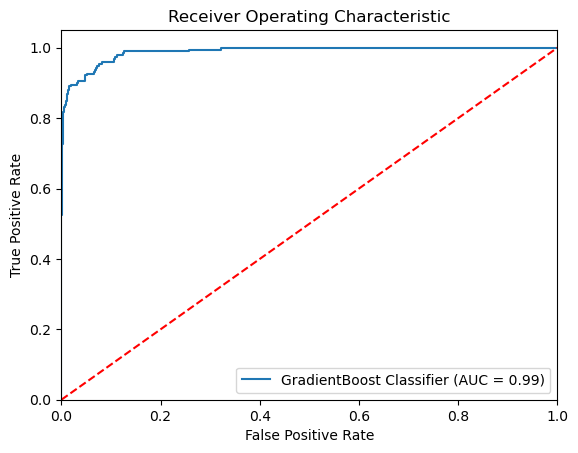

In [34]:
# Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

plt.figure()

auc_models = [
    {
        'label': "GradientBoost Classifier",
        'model': GradientBoostingClassifier(n_estimators=500,max_depth=15 ,loss='exponential' ,criterion='friedman_mse' ,min_samples_split=15),
        'auc':0.9104
    },
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)

    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label='%s (AUC = %.2f)' % (algo['label'], auc_score))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('auc.png')
plt.show()
